# numpy

In [24]:
import numpy as np
from sklearn import datasets

# 获取鸢尾花的数据
iris = datasets.load_iris()
iris_Y = iris.target
iris_X = iris.data

def c_means_clustering(X, c=3, max_iterations=100):
    # 初始化聚类中心
    centroids = X[np.random.choice(X.shape[0], c, replace=False)]
    
    for _ in range(max_iterations):
        # 计算样本到聚类中心的距离
        distances = np.linalg.norm(X[:, np.newaxis] - centroids, axis=-1)
        
        # 分配样本到最近的聚类中心
        labels = np.argmin(distances, axis=1)
        
        # 更新聚类中心
        for i in range(c):
            centroids[i] = np.mean(X[labels == i], axis=0)
    
    return labels, centroids

# 使用c均值算法进行聚类
cluster_labels, cluster_centers = c_means_clustering(iris_X, c=3)

# 调整标签值
def adjust_labels(labels, targets):
    adjusted_labels = np.zeros_like(labels)
    for cluster in np.unique(labels):
        mask = labels == cluster
        adjusted_labels[mask] = np.bincount(targets[mask]).argmax()
    return adjusted_labels

# 调整标签值
adjusted_labels = adjust_labels(cluster_labels, iris_Y)

# 计算准确率
accuracy = np.mean(adjusted_labels == iris_Y)

# 打印输出结果
print("实际分类：", iris_Y)
print("聚类结果：", adjusted_labels)
print("聚类中心：", cluster_centers)
print("准确率：{:.2%}".format(accuracy))

实际分类： [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
聚类结果： [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 2 2 2 1 2 2 2 2
 2 2 1 1 2 2 2 2 1 2 1 2 1 2 2 1 1 2 2 2 2 2 1 2 2 2 2 1 2 2 2 1 2 2 2 1 2
 2 1]
聚类中心： [[6.85       3.07368421 5.74210526 2.07105263]
 [5.9016129  2.7483871  4.39354839 1.43387097]
 [5.006      3.428      1.462      0.246     ]]
准确率：89.33%


# nklearn

In [25]:
import numpy as np
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score

# 获取鸢尾花的数据
iris = datasets.load_iris()
iris_Y = iris.target
iris_X = iris.data

# 使用K均值算法进行聚类
kmeans = KMeans(n_clusters=3, random_state=42)
cluster_labels = kmeans.fit_predict(iris_X)
cluster_centers = kmeans.cluster_centers_

# 调整标签值
def adjust_labels(labels, targets):
    adjusted_labels = np.zeros_like(labels)
    for cluster in np.unique(labels):
        mask = labels == cluster
        adjusted_labels[mask] = np.bincount(targets[mask]).argmax()
    return adjusted_labels

# 调整标签值
adjusted_labels = adjust_labels(cluster_labels, iris_Y)

# 计算准确率
accuracy = accuracy_score(iris_Y, adjusted_labels)

# 打印输出结果
print("实际分类：", iris_Y)
print("聚类结果：", adjusted_labels)
print("聚类中心：", cluster_centers)
print("准确率：{:.2%}".format(accuracy))

实际分类： [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
聚类结果： [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 2 2 2 1 2 2 2 2
 2 2 1 1 2 2 2 2 1 2 1 2 1 2 2 1 1 2 2 2 2 2 1 2 2 2 2 1 2 2 2 1 2 2 2 1 2
 2 1]
聚类中心： [[5.9016129  2.7483871  4.39354839 1.43387097]
 [5.006      3.428      1.462      0.246     ]
 [6.85       3.07368421 5.74210526 2.07105263]]
准确率：89.33%


In [37]:
import numpy as np
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score

def c_means_clustering(X, c=3, max_iterations=100):
    # 初始化聚类中心
    centroids = X[np.random.choice(X.shape[0], c, replace=False)]
    
    for _ in range(max_iterations):
        # 计算样本到聚类中心的距离
        distances = np.linalg.norm(X[:, np.newaxis] - centroids, axis=-1)
        
        # 分配样本到最近的聚类中心
        labels = np.argmin(distances, axis=1)
        
        # 更新聚类中心
        for i in range(c):
            centroids[i] = np.mean(X[labels == i], axis=0)
    
    return labels, centroids


# 获取鸢尾花的数据
iris = datasets.load_iris()
iris_Y = iris.target
iris_X = iris.data


def run_clustering(iris_X, iris_Y):
    # 使用c均值算法进行聚类（使用numpy实现）
    cluster_labels_cmeans_np, cluster_centers_cmeans_np = c_means_clustering(iris_X, c=3)

    # 使用c均值算法进行聚类（使用sklearn实现）
    kmeans = KMeans(n_clusters=3, random_state=42)
    cluster_labels_cmeans_sklearn = kmeans.fit_predict(iris_X)
    cluster_centers_cmeans_sklearn = kmeans.cluster_centers_

    # 调整标签值
    def adjust_labels(labels, targets):
        adjusted_labels = np.zeros_like(labels)
        for cluster in np.unique(labels):
            mask = labels == cluster
            adjusted_labels[mask] = np.bincount(targets[mask]).argmax()
        return adjusted_labels

    # 调整标签值
    adjusted_labels_cmeans_np = adjust_labels(cluster_labels_cmeans_np, iris_Y)
    adjusted_labels_cmeans_sklearn = adjust_labels(cluster_labels_cmeans_sklearn, iris_Y)

    # 计算准确率
    accuracy_cmeans_np = accuracy_score(iris_Y, adjusted_labels_cmeans_np)
    accuracy_cmeans_sklearn = accuracy_score(iris_Y, adjusted_labels_cmeans_sklearn)

    # 打印输出结果
    print("实际分类：", iris_Y)
    print("C均值聚类结果（使用numpy实现）：", adjusted_labels_cmeans_np)
    print("C均值聚类中心（使用numpy实现）：", cluster_centers_cmeans_np)
    print("C均值准确率（使用numpy实现）：{:.2%}".format(accuracy_cmeans_np))
    print("C均值聚类结果（使用sklearn实现）：", adjusted_labels_cmeans_sklearn)
    print("C均值聚类中心（使用sklearn实现）：", cluster_centers_cmeans_sklearn)
    print("C均值准确率（使用sklearn实现）：{:.2%}".format(accuracy_cmeans_sklearn))


# 运行聚类函数
run_clustering(iris_X, iris_Y)

实际分类： [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
C均值聚类结果（使用numpy实现）： [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 2 2 2 1 2 2 2 2
 2 2 1 1 2 2 2 2 1 2 1 2 1 2 2 1 1 2 2 2 2 2 1 2 2 2 2 1 2 2 2 1 2 2 2 1 2
 2 1]
C均值聚类中心（使用numpy实现）： [[6.85       3.07368421 5.74210526 2.07105263]
 [5.9016129  2.7483871  4.39354839 1.43387097]
 [5.006      3.428      1.462      0.246     ]]
C均值准确率（使用numpy实现）：89.33%
C均值聚类结果（使用sklearn实现）： [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 

实际分类： [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
C均值聚类结果（使用numpy实现）： [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 2 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 2 2 2 1 2 2 2 2
 2 2 1 1 2 2 2 2 1 2 1 2 1 2 2 1 1 2 2 2 2 2 1 2 2 2 2 1 2 2 2 1 2 2 2 1 2
 2 1]
C均值聚类中心（使用numpy实现）： [[5.006      3.428      1.462      0.246     ]
 [5.88360656 2.74098361 4.38852459 1.43442623]
 [6.85384615 3.07692308 5.71538462 2.05384615]]
C均值准确率（使用numpy实现）：88.67%
###############################################################################
C均值聚类结果（使用sklearn实现）： [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

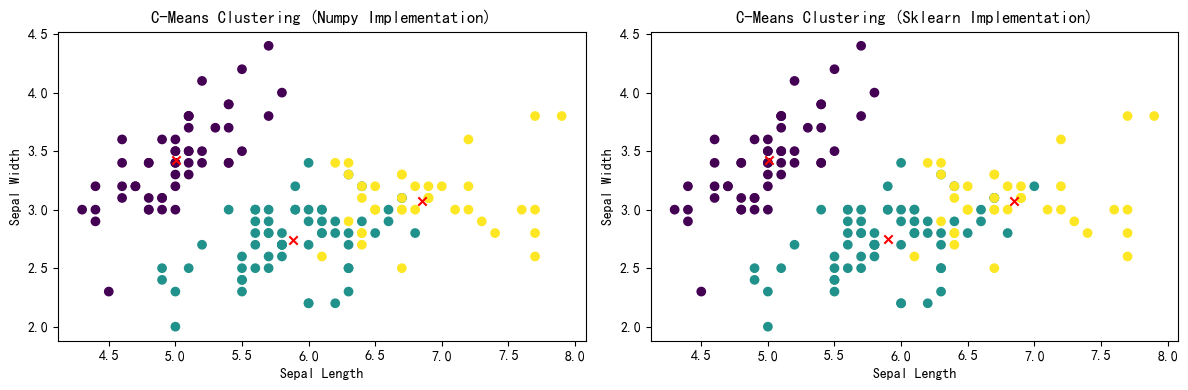

In [31]:
# 可视化
import numpy as np
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# 获取鸢尾花的数据
iris = datasets.load_iris()
iris_Y = iris.target
iris_X = iris.data

def c_means_clustering(X, c=3, max_iterations=100):
    # 初始化聚类中心
    centroids = X[np.random.choice(X.shape[0], c, replace=False)]
    for _ in range(max_iterations):
        # 计算样本到聚类中心的距离
        distances = np.linalg.norm(X[:, np.newaxis] - centroids, axis=-1)
        # 分配样本到最近的聚类中心
        labels = np.argmin(distances, axis=1)
        # 更新聚类中心
        for i in range(c):
            centroids[i] = np.mean(X[labels == i], axis=0)
    
    return labels, centroids

def run_clustering(iris_X, iris_Y):
    # 使用c均值算法进行聚类（使用numpy实现）
    cluster_labels_cmeans_np, cluster_centers_cmeans_np = c_means_clustering(iris_X, c=3)

    # 使用c均值算法进行聚类（使用sklearn实现）
    kmeans = KMeans(n_clusters=3, random_state=42)
    cluster_labels_cmeans_sklearn = kmeans.fit_predict(iris_X)
    cluster_centers_cmeans_sklearn = kmeans.cluster_centers_

    # 调整标签值
    def adjust_labels(labels, targets):
        adjusted_labels = np.zeros_like(labels)
        for cluster in np.unique(labels):
            mask = labels == cluster
            adjusted_labels[mask] = np.bincount(targets[mask]).argmax()
        return adjusted_labels

    # 调整标签值
    adjusted_labels_cmeans_np = adjust_labels(cluster_labels_cmeans_np, iris_Y)
    adjusted_labels_cmeans_sklearn = adjust_labels(cluster_labels_cmeans_sklearn, iris_Y)

    # 计算准确率
    accuracy_cmeans_np = accuracy_score(iris_Y, adjusted_labels_cmeans_np)
    accuracy_cmeans_sklearn = accuracy_score(iris_Y, adjusted_labels_cmeans_sklearn)

    # 打印输出结果
    print("实际分类：", iris_Y)
    print("C均值聚类结果（使用numpy实现）：", adjusted_labels_cmeans_np)
    print("C均值聚类中心（使用numpy实现）：", cluster_centers_cmeans_np)
    print("C均值准确率（使用numpy实现）：{:.2%}".format(accuracy_cmeans_np))

    print("###############################################################################")#################")

    print("C均值聚类结果（使用sklearn实现）：", adjusted_labels_cmeans_sklearn)
    print("C均值聚类中心（使用sklearn实现）：", cluster_centers_cmeans_sklearn)
    print("C均值准确率（使用sklearn实现）：{:.2%}".format(accuracy_cmeans_sklearn))

    # 可视化聚类结果
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.scatter(iris_X[:, 0], iris_X[:, 1], c=adjusted_labels_cmeans_np)
    plt.scatter(cluster_centers_cmeans_np[:, 0], cluster_centers_cmeans_np[:, 1], c='red', marker='x')
    plt.xlabel('Sepal Length')
    plt.ylabel('Sepal Width')
    plt.title('C-Means Clustering (Numpy Implementation)')

    plt.subplot(1, 2, 2)
    plt.scatter(iris_X[:, 0], iris_X[:, 1], c=adjusted_labels_cmeans_sklearn)
    plt.scatter(cluster_centers_cmeans_sklearn[:, 0], cluster_centers_cmeans_sklearn[:, 1], c='red', marker='x')
    plt.xlabel('Sepal Length')
    plt.ylabel('Sepal Width')
    plt.title('C-Means Clustering (Sklearn Implementation)')

    plt.tight_layout()
    plt.show()


# 运行聚类函数
run_clustering(iris_X, iris_Y)

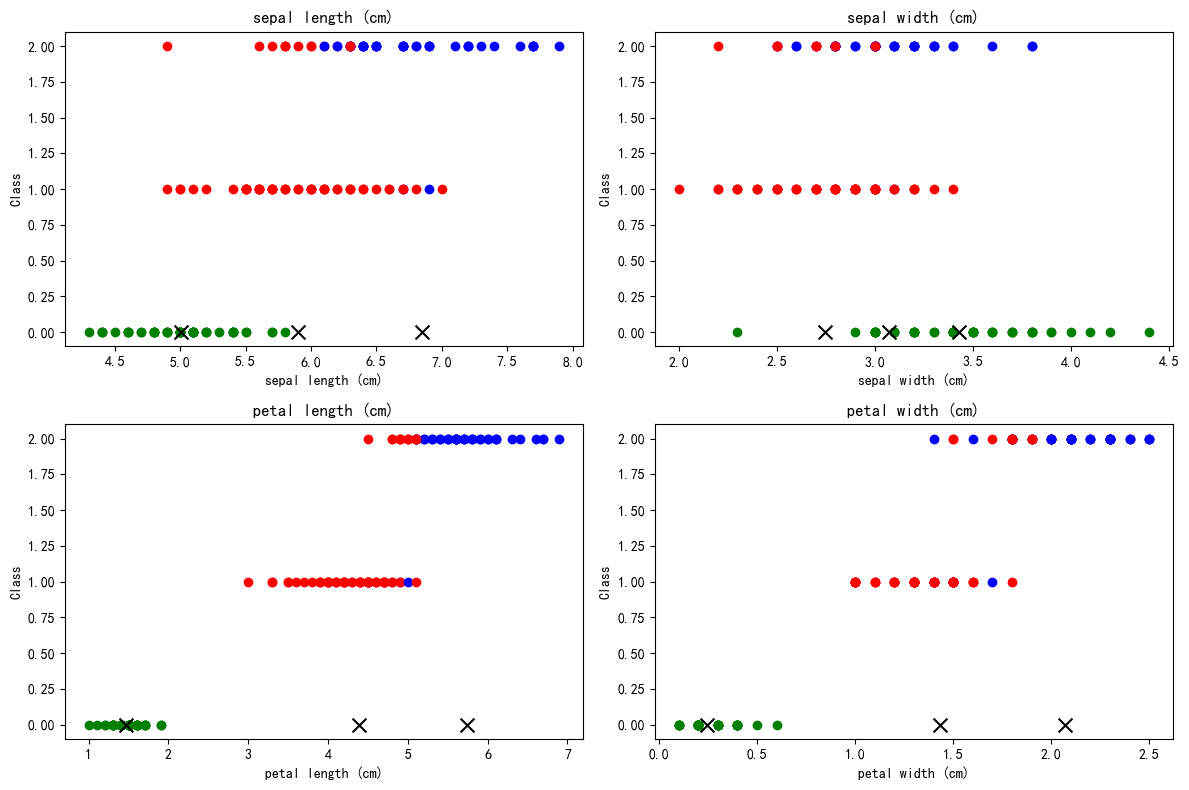

In [39]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.cluster import KMeans

# 获取鸢尾花的数据
iris = datasets.load_iris()
iris_X = iris.data
iris_y = iris.target

# 使用K均值算法进行聚类
kmeans = KMeans(n_clusters=3, random_state=42)
cluster_labels = kmeans.fit_predict(iris_X)
cluster_centers = kmeans.cluster_centers_

# 获取特征名称
feature_names = iris.feature_names

# 创建子图
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

# 遍历每个特征并绘制散点图
for i, ax in enumerate(axs.flatten()):
    # 获取当前特征的数据
    feature_data = iris_X[:, i]

    # 绘制每个样本点
    for j in range(len(iris_X)):
        # 获取样本的特征和标签
        x = feature_data[j]
        y = iris_y[j]

        # 根据聚类结果设置点的颜色
        color = "red" if cluster_labels[j] == 0 else "green" if cluster_labels[j] == 1 else "blue"

        # 绘制样本点
        ax.scatter(x, y, color=color)

    # 绘制聚类中心点
    ax.scatter(cluster_centers[:, i], np.zeros_like(cluster_centers[:, i]), marker="x", color="black", s=100, label="Centroids")

    # 设置子图标题和坐标轴标签
    ax.set_title(feature_names[i])
    ax.set_xlabel(feature_names[i])
    ax.set_ylabel("Class")

# 调整子图之间的间距
plt.tight_layout()

plt.show()

In [40]:
import numpy as np
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# 获取鸢尾花的数据
iris = datasets.load_iris()
iris_X = iris.data

# 使用K均值算法进行聚类
kmeans = KMeans(n_clusters=3, random_state=42)
cluster_labels = kmeans.fit_predict(iris_X)
cluster_centers = kmeans.cluster_centers_

# 计算簇内的方差
cluster_variances = []
for i in range(3):
    cluster_samples = iris_X[cluster_labels == i]
    cluster_variance = np.var(cluster_samples, axis=0)
    cluster_variances.append(cluster_variance)

# 计算轮廓系数
silhouette_avg = silhouette_score(iris_X, cluster_labels)

print("簇内的方差:")
for i, variance in enumerate(cluster_variances):
    print("簇 {} 的方差: {}".format(i, variance))

print("轮廓系数: {:.3f}".format(silhouette_avg))

簇内的方差:
簇 0 的方差: [0.21402966 0.08636837 0.25479709 0.08707856]
簇 1 的方差: [0.121764 0.140816 0.029556 0.010884]
簇 2 的方差: [0.23776316 0.08193906 0.23243767 0.07626731]
轮廓系数: 0.553
